<a href="https://colab.research.google.com/github/sandeeptuluri/fresh1/blob/main/text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries.....

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV....

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/fresh1/main/Data%20extract%20for%20Sandeep.csv')
df.head()

,id,summary,topicID,topicName
0,26696,Expo 2020 Dubai is finally open after an 8-mon...,13,Technology
1,26694,The EU has announced a humanitarian aid packag...,3,Politics
2,26693,Dutch royal weddings need the approval of parl...,3,Politics
3,26692,Governor Sheinbaum has confirmed that a statue...,10,North America
4,26690,US officials are investigating possible cases ...,3,Politics


In [21]:
df.isnull().sum()

id           0
summary      0
topicID      0
topicName    0
dtype: int64

In [22]:
df.topicName.nunique()

29

In [23]:
df.describe()


,id,topicID
count,12802.000000,12802.000000
mean,18746.503359,9.722231
std,4643.310327,6.670339
min,10858.000000,2.000000
25%,14614.250000,5.000000
50%,18707.500000,7.000000
75%,22829.750000,14.000000
max,26696.000000,33.000000


Data is very clean....and ready to use

In [24]:
df['summary'] = df['summary'].apply(lambda summary: (summary).lower())

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df['summary']
y = df['topicID']

Splitting the data for efficient use....

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from tensorflow.keras.utils import to_categorical


In [29]:
ytr = to_categorical(y_train)


In [30]:
ytr.shape

(8961, 34)

In [31]:
yte = to_categorical(y_test)

In [32]:
yte.shape

(3841, 34)

In [33]:
import tensorflow as tf


In [34]:
import tensorflow_hub as hub

Importing the pretrained embedded layer from google....for better training the model...

In [35]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
#hub_layer(train)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Preparing the model....

In [39]:
model = Sequential()
model.add(hub_layer)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(34, activation='softmax'))

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Fitting the model....

In [42]:
model.fit(X_train,ytr,epochs=10,validation_data=(X_test,yte),verbose=1)

Epoch 1/10
281/281 [==============================] - 151s 536ms/step - loss: 2.4312 - accuracy: 0.3269 - val_loss: 2.0635 - val_accuracy: 0.4064
Epoch 2/10
281/281 [==============================] - 150s 532ms/step - loss: 1.7555 - accuracy: 0.5009 - val_loss: 1.9309 - val_accuracy: 0.4400
Epoch 3/10
281/281 [==============================] - 149s 531ms/step - loss: 1.3058 - accuracy: 0.6074 - val_loss: 2.0825 - val_accuracy: 0.4212
Epoch 4/10
281/281 [==============================] - 150s 533ms/step - loss: 0.9298 - accuracy: 0.7068 - val_loss: 2.5124 - val_accuracy: 0.4033
Epoch 5/10
281/281 [==============================] - 149s 531ms/step - loss: 0.6402 - accuracy: 0.7944 - val_loss: 3.0267 - val_accuracy: 0.3895
Epoch 6/10
281/281 [==============================] - 149s 530ms/step - loss: 0.4510 - accuracy: 0.8614 - val_loss: 3.7702 - val_accuracy: 0.3601
Epoch 7/10
281/281 [==============================] - 150s 534ms/step - loss: 0.3054 - accuracy: 0.9092 - val_loss: 4.3043 -

In [43]:
metrics = pd.DataFrame(model.history.history)

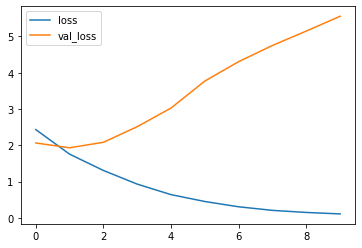

In [44]:
metrics[['loss','val_loss']].plot()

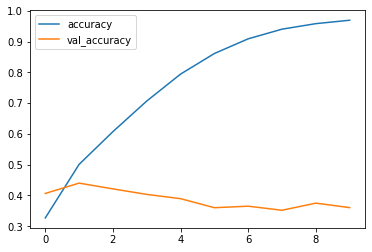

In [45]:
metrics[['accuracy','val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(X_test,yte,verbose=0)

[5.554201602935791, 0.36032283306121826]

In [48]:
predictions = model.predict(X_test)

In [50]:
a = X_test[:1]

In [51]:
a

5621    yeimo, a papuan activist was arrested and char...
Name: summary, dtype: object

In [52]:
h = model.predict(a)

In [53]:
h

array([[4.7434837e-11, 3.3666613e-12, 1.2492764e-05, 6.5413415e-01,
        2.3747793e-10, 1.1853002e-05, 4.8625605e-08, 1.7596791e-04,
        3.9511194e-04, 2.6246953e-01, 5.2314331e-06, 3.4277625e-03,
        6.3862205e-02, 3.0407091e-07, 5.3442864e-07, 1.4731835e-06,
        3.1076432e-08, 3.5671681e-11, 1.0722136e-04, 1.5667196e-05,
        2.8718852e-05, 6.6237987e-10, 3.9413466e-11, 8.6725099e-10,
        9.2194863e-10, 2.0507977e-11, 1.5351218e-02, 3.6657673e-07,
        6.4462704e-08, 1.7686824e-09, 5.7050227e-09, 7.2645867e-10,
        2.8889915e-10, 1.2575403e-08]], dtype=float32)

In [54]:
np.argmax(h)

3

Here, the model predicted the accurate result.... and the accuracy is also quiet good....

In [55]:
!mkdir -p saved_model
model.save('saved_model/text_classification')

INFO:tensorflow:Assets written to: saved_model/text_classification/assets


INFO:tensorflow:Assets written to: saved_model/text_classification/assets


In [56]:
ls

sample_data/  saved_model/


In [57]:
ls saved_model/

text_classification/


In [58]:
ls saved_model/text_classification

assets/  keras_metadata.pb  saved_model.pb  variables/


In [59]:
import tensorflow as tf

In [60]:
main = tf.keras.models.load_model('saved_model/text_classification/')

In [73]:
k = X_test[4:5]

In [74]:
z = main.predict(k)

In [75]:
z

array([[1.02120633e-17, 5.94897113e-17, 1.00214265e-05, 2.10011967e-05,
        6.99373129e-11, 1.05350023e-06, 5.61871047e-07, 4.96313395e-03,
        8.10585334e-04, 1.23894168e-07, 2.07744022e-09, 9.38074862e-08,
        3.22432192e-10, 7.77136022e-10, 1.39369339e-01, 1.70075265e-09,
        3.09258148e-08, 1.35251352e-15, 3.99651201e-09, 5.69242593e-06,
        8.54791641e-01, 2.65937106e-05, 1.76536330e-15, 9.74981443e-17,
        5.97631000e-10, 2.71032672e-08, 1.94540539e-09, 9.41649390e-08,
        4.47464739e-11, 2.02306691e-13, 2.31059373e-11, 2.60174571e-09,
        3.76652343e-14, 2.13883978e-13]], dtype=float32)

In [76]:
np.argmax(z[0])

20